## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [2]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0723 14:37:16.128952 4592653760 deprecation_wrapper.py:119] From /Users/vincent/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0723 14:37:16.130537 4592653760 deprecation_wrapper.py:119] From /Users/vincent/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0723 14:37:16.151566 4592653760 deprecation_wrapper.py:119] From /Users/vincent/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 14:37:16.152940 4592653760 deprecation_wrapper.py:119] From /Users/vincent/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8275 - acc: 0.3451 - val_loss: 1.6446 - val_acc: 0.4117
Epoch 2/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5986 - acc: 0.4320 - val_loss: 1.6138 - val_acc: 0.4177
Epoch 3/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5106 - acc: 0.4626 - val_loss: 1.5147 - val_acc: 0.4649
Epoch 4/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4528 - acc: 0.4827 - val_loss: 1.5230 - val_acc: 0.4580
Epoch 5/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4093 - acc: 0.4977 - val_loss: 1.4349 - val_acc: 0.4913
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.3680 - acc: 0.5146 - val_loss: 1.4576 - val_acc: 0.4841
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.3328 - acc: 0.5272 - val_loss: 1.4294 - val_acc

50000/50000 [==============================] - 3s 69us/step - loss: 1.8128 - acc: 0.3596 - val_loss: 1.7616 - val_acc: 0.3800
Epoch 3/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.7336 - acc: 0.3891 - val_loss: 1.6980 - val_acc: 0.3971
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6743 - acc: 0.4118 - val_loss: 1.6538 - val_acc: 0.4203
Epoch 5/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.6264 - acc: 0.4287 - val_loss: 1.6070 - val_acc: 0.4357
Epoch 6/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5850 - acc: 0.4443 - val_loss: 1.5775 - val_acc: 0.4444
Epoch 7/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5508 - acc: 0.4550 - val_loss: 1.5533 - val_acc: 0.4518
Epoch 8/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5190 - acc: 0.4673 - val_loss: 1.5299 - val_acc: 0.4587
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.9921 - acc: 0.2932 - val_loss: 1.9721 - val_acc: 0.3007
Epoch 5/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.9510 - acc: 0.3109 - val_loss: 1.9362 - val_acc: 0.3151
Epoch 6/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.9191 - acc: 0.3231 - val_loss: 1.9091 - val_acc: 0.3289
Epoch 7/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.8936 - acc: 0.3332 - val_loss: 1.8868 - val_acc: 0.3372
Epoch 8/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.8722 - acc: 0.3439 - val_loss: 1.8670 - val_acc: 0.3430
Epoch 9/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.8535 - acc: 0.3497 - val_loss: 1.8498 - val_acc: 0.3511
Epoch 10/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.8370 - acc: 0.3566 - val_loss: 1.8345 - val_acc: 0.3578
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 4s 72us/step - loss: 2.2339 - acc: 0.1988 - val_loss: 2.2269 - val_acc: 0.2039
Epoch 6/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.2206 - acc: 0.2091 - val_loss: 2.2140 - val_acc: 0.2115
Epoch 7/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.2083 - acc: 0.2174 - val_loss: 2.2019 - val_acc: 0.2199
Epoch 8/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.1967 - acc: 0.2255 - val_loss: 2.1905 - val_acc: 0.2243
Epoch 9/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.1858 - acc: 0.2312 - val_loss: 2.1798 - val_acc: 0.2288
Epoch 10/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.1753 - acc: 0.2373 - val_loss: 2.1693 - val_acc: 0.2356
Epoch 11/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.1652 - acc: 0.2426 - val_loss: 2.1592 - val_acc: 0.2408
Epoch 12/50
50000/50000 [=========================

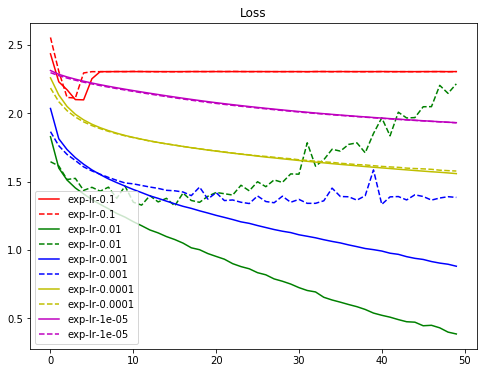

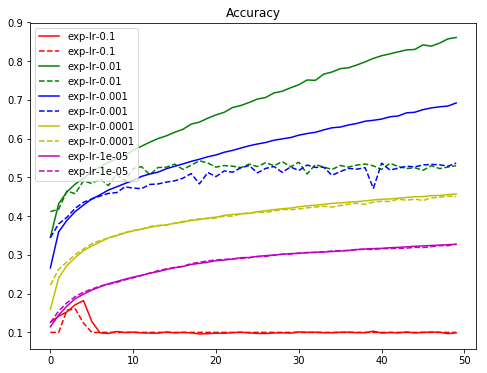

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8978 - acc: 0.3137 - val_loss: 1.7291 - val_acc: 0.3780
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6745 - acc: 0.3989 - val_loss: 1.6151 - val_acc: 0.4196
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5891 - acc: 0.4341 - val_loss: 1.5720 - val_acc: 0.4409
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5476 - acc: 0.4464 - val_loss: 1.5463 - val_acc: 0.4442
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5020 - acc: 0.4618 - val_loss: 1.4807 - val_acc: 0.4684
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.4498 - acc: 0.4834 - val_loss: 1.4423 - val_acc: 0.4893
Epoch 7/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4292 - acc: 0.4889 - val_loss: 1.4546 - val_acc

50000/50000 [==============================] - 3s 63us/step - loss: 1.8314 - acc: 0.3514 - val_loss: 1.7829 - val_acc: 0.3642
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7510 - acc: 0.3829 - val_loss: 1.7390 - val_acc: 0.3759
Epoch 4/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6922 - acc: 0.4012 - val_loss: 1.6586 - val_acc: 0.4122
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6420 - acc: 0.4228 - val_loss: 1.6312 - val_acc: 0.4183
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6074 - acc: 0.4330 - val_loss: 1.6253 - val_acc: 0.4242
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5754 - acc: 0.4439 - val_loss: 1.5724 - val_acc: 0.4411
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5420 - acc: 0.4558 - val_loss: 1.5767 - val_acc: 0.4379
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.9674 - acc: 0.3082 - val_loss: 1.9454 - val_acc: 0.3213
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9324 - acc: 0.3214 - val_loss: 1.9155 - val_acc: 0.3352
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.9034 - acc: 0.3321 - val_loss: 1.8913 - val_acc: 0.3417
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8793 - acc: 0.3412 - val_loss: 1.8686 - val_acc: 0.3474
Epoch 8/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8585 - acc: 0.3496 - val_loss: 1.8515 - val_acc: 0.3528
Epoch 9/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8405 - acc: 0.3571 - val_loss: 1.8321 - val_acc: 0.3638
Epoch 10/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8244 - acc: 0.3629 - val_loss: 1.8174 - val_acc: 0.3723
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 66us/step - loss: 2.2213 - acc: 0.2099 - val_loss: 2.2130 - val_acc: 0.2188
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.2077 - acc: 0.2195 - val_loss: 2.1998 - val_acc: 0.2303
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.1950 - acc: 0.2293 - val_loss: 2.1873 - val_acc: 0.2378
Epoch 8/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.1828 - acc: 0.2364 - val_loss: 2.1752 - val_acc: 0.2470
Epoch 9/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.1708 - acc: 0.2439 - val_loss: 2.1632 - val_acc: 0.2509
Epoch 10/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.1592 - acc: 0.2493 - val_loss: 2.1519 - val_acc: 0.2596
Epoch 11/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.1482 - acc: 0.2553 - val_loss: 2.1412 - val_acc: 0.2672
Epoch 12/50
50000/50000 [=========================

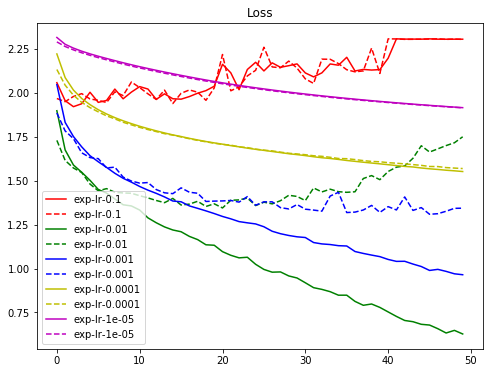

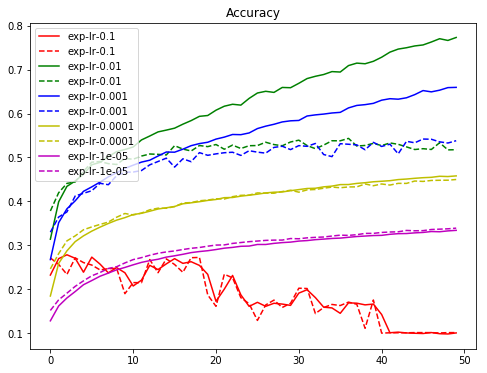

In [10]:
## nesterov is false

results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.0966 - acc: 0.2392 - val_loss: 1.9677 - val_acc: 0.3051
Epoch 2/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.9080 - acc: 0.3256 - val_loss: 1.8637 - val_acc: 0.3460
Epoch 3/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.8322 - acc: 0.3546 - val_loss: 1.8442 - val_acc: 0.3357
Epoch 4/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.7822 - acc: 0.3733 - val_loss: 1.8191 - val_acc: 0.3481
Epoch 5/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.7414 - acc: 0.3878 - val_loss: 1.7186 - val_acc: 0.3926
Epoch 6/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.7091 - acc: 0.4000 - val_loss: 1.7185 - val_acc: 0.3836
Epoch 7/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.6810 - acc: 0.4092 - val_loss: 1.7398 - val_acc

50000/50000 [==============================] - 4s 72us/step - loss: 2.1809 - acc: 0.2156 - val_loss: 2.1468 - val_acc: 0.2413
Epoch 3/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.1264 - acc: 0.2476 - val_loss: 2.0988 - val_acc: 0.2691
Epoch 4/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.0819 - acc: 0.2668 - val_loss: 2.0577 - val_acc: 0.2830
Epoch 5/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0443 - acc: 0.2831 - val_loss: 2.0230 - val_acc: 0.2941
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.0126 - acc: 0.2952 - val_loss: 1.9946 - val_acc: 0.3080
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.9858 - acc: 0.3059 - val_loss: 1.9699 - val_acc: 0.3148
Epoch 8/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.9626 - acc: 0.3145 - val_loss: 1.9484 - val_acc: 0.3203
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.2767 - acc: 0.1431 - val_loss: 2.2694 - val_acc: 0.1489
Epoch 5/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2647 - acc: 0.1515 - val_loss: 2.2576 - val_acc: 0.1606
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.2532 - acc: 0.1602 - val_loss: 2.2463 - val_acc: 0.1706
Epoch 7/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2423 - acc: 0.1701 - val_loss: 2.2359 - val_acc: 0.1788
Epoch 8/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.2320 - acc: 0.1776 - val_loss: 2.2260 - val_acc: 0.1887
Epoch 9/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.2224 - acc: 0.1869 - val_loss: 2.2167 - val_acc: 0.1951
Epoch 10/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.2131 - acc: 0.1947 - val_loss: 2.2078 - val_acc: 0.2036
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 65us/step - loss: 2.3676 - acc: 0.1080 - val_loss: 2.3643 - val_acc: 0.1050
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.3605 - acc: 0.1089 - val_loss: 2.3573 - val_acc: 0.1059
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.3540 - acc: 0.1095 - val_loss: 2.3509 - val_acc: 0.1065
Epoch 8/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.3480 - acc: 0.1104 - val_loss: 2.3451 - val_acc: 0.1074
Epoch 9/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.3425 - acc: 0.1110 - val_loss: 2.3397 - val_acc: 0.1088
Epoch 10/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.3375 - acc: 0.1111 - val_loss: 2.3348 - val_acc: 0.1109
Epoch 11/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.3329 - acc: 0.1122 - val_loss: 2.3303 - val_acc: 0.1121
Epoch 12/50
50000/50000 [=========================

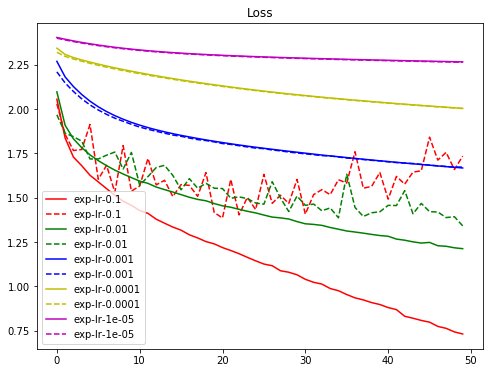

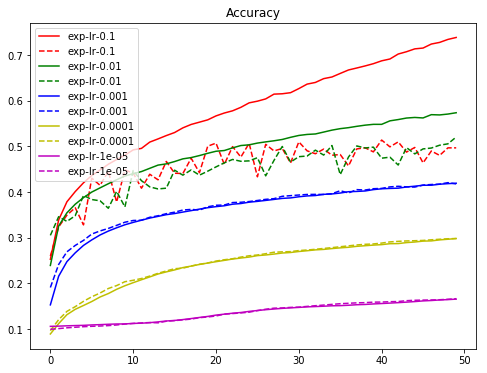

In [11]:
## nesterov is true
##smaller momrntun
## 超參數設定
#using different momentun
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.1

results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

MOMENTUM:0.95
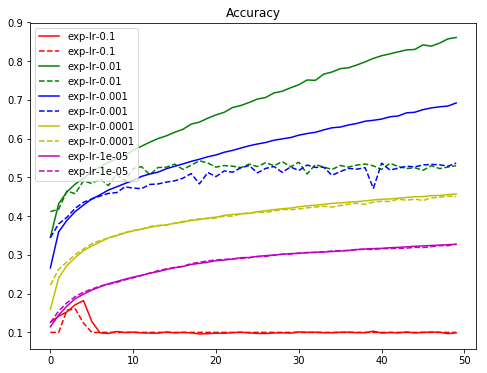
MOMENTUM:0.1
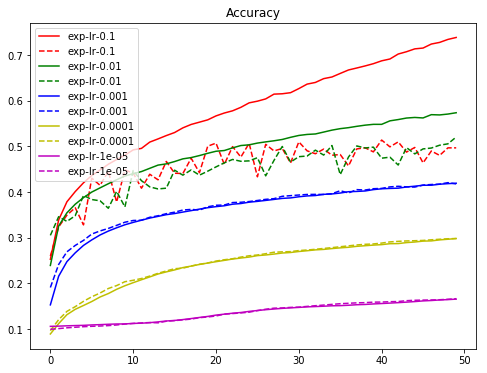
nesterov is false
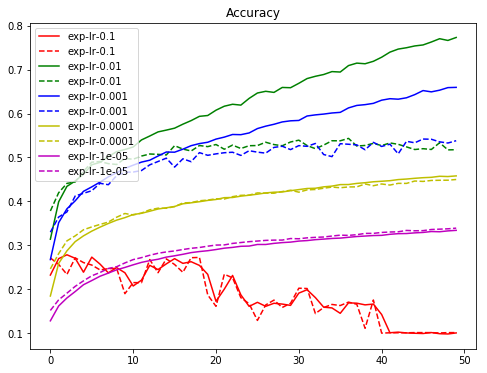